# metodologia

Usaremos o *python* com o *jupyter*, o qual facilita as aplicações e visualizações dos dados. Desta forma, para obter os gráficos, precisamos encontrar como a velocidade e a posição varia com o tempo. Com isto, para resolver as EDOs, utilizaremos o _scipy_, _numpy_ e _matplotlib_ para gerar os gráficos. Além disso, sempre usaremos valores na unidade internacional, dessa forma, não será informado durante todo o documento, pois já foi definido logo no incio.

Todo o código-fonte está no repositório do GitHub: <https://github.com/MarcioBulla/Movimento-de-projeteis>

## Importando bibliotecas mencionadas:

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib as mpl

### Definindo parametros para plotar os graficos de forma mais atraente:

In [2]:
norm = mpl.colors.Normalize(vmin=0, vmax=90)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.gist_rainbow)
cmap.set_array([])
cmap2 = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.rainbow)
cmap2.set_array([])
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["lines.linewidth"] = 3
plt.rcParams["axes.grid"] = True
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0
plt.rcParams["lines.markersize"] = 10

# Questão 1
As condições iniciais são: $x(0)=z(0)=0$ e $\vec{v}(0)=v_0\hat{v}$.

Sendo $\vec{v_0} = v_0\cos{\theta}\hat{\imath} + v_0\sin{\theta}\hat{k}$

## Alternativa (a)

Para resolver esta questão precisamos desmembrar o vetor posição em suas componentes.
$$ m \frac{d^2\vec{r}}{dt^2} =-mg\hat{k} - c\vec{v}|\vec{v}|$$

Dessa forma, temos duas EDO de segunda ordem.

$$ \frac{d^2x}{dt^2} = - \frac{c}{m} \frac{dx}{dt}\sqrt{\left(\frac{dx}{dt} \right)^2 + \left(\frac{dz}{dt} \right)^2}
$$
$$\frac{d^2x}{dt^2} = - g - \frac{c}{m} \frac{dz}{dt}\sqrt{\left(\frac{dx}{dt} \right)^2 + \left(\frac{dz}{dt} \right)^2}
$$

Usaremos as função *solve_ivp* do _scipe_ para encontrar as soluções.

#### Definindo a função das EDOs para resolvê-las:

In [3]:
def r(t, r, g, c, m):
    x, z, vx, vz = r
    ddx = -c/m * vx * np.hypot(x, z)  # Derivada da segunda de x
    ddz = -g - c/m * vz * np.hypot(x, z)  # Derivada da segunda de z
    return [vx, vz, ddx, ddz]

#### Definindo condições iniciais, constantes, intervalo da solução numerica:

In [4]:
# Condições iniciais
x0 = 0
z0 = 0
v0 = 30
theta = np.radians(45)
vx0 = v0*np.cos(theta)
vz0 = v0*np.sin(theta)
# Constantes
g = 9.8
c = 0.5
m = 10
# Intervalo da solução
t = np.linspace(0, 5, 100, True)

#### Resolvendo as EDOs numericamente com o método LSODA:

In [5]:
sol = solve_ivp(fun=r, t_span=[t[0], t[-1]], y0=[x0, z0, vx0, vz0], method="LSODA", t_eval=t, args=(g, c, m))

#### Plotando gráfico do comportamentos horizontais em função do tempo:

(-0.9404243892796738, 22.213203435596427)

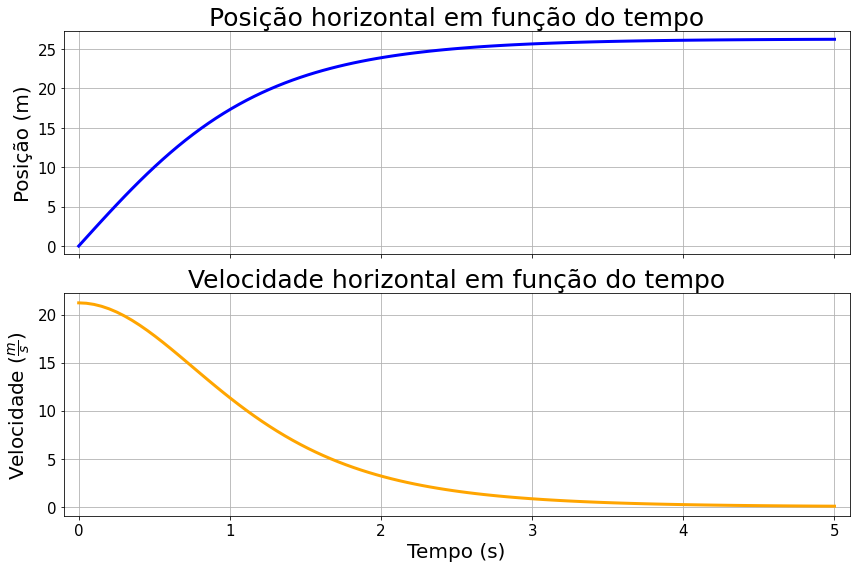

In [6]:
fig, ((x), (vx)) = plt.subplots(2, 1, sharex=True)
x.plot(sol.t, sol.y[0], c="b")
x.set_ylabel("Posição (m)")
x.set_title("Posição horizontal em função do tempo")
x.set_ylim(sol.y[0].min()-1, sol.y[0].max()+1)

vx.plot(sol.t, sol.y[2], c="orange")
vx.set_xlabel("Tempo (s)")
vx.set_ylabel(r"Velocidade ($\frac{m}{s}$)")
vx.set_title("Velocidade horizontal em função do tempo")
vx.set_xlim(t[0]-.1, t[-1]+.1)
vx.set_ylim(sol.y[2].min()-1, sol.y[2].max()+1)

Gráfico da velocidade em função do tempo: note que esta favorável com o que esperamos com uma velocidade tendendo a zero, pois, a resistência freará o prójetil até que pare. Desta forma, a posição estagna.

#### Plotando gráfico do comportamento vertical em função do tempo:

(-8.349108400192053, 22.213203435596423)

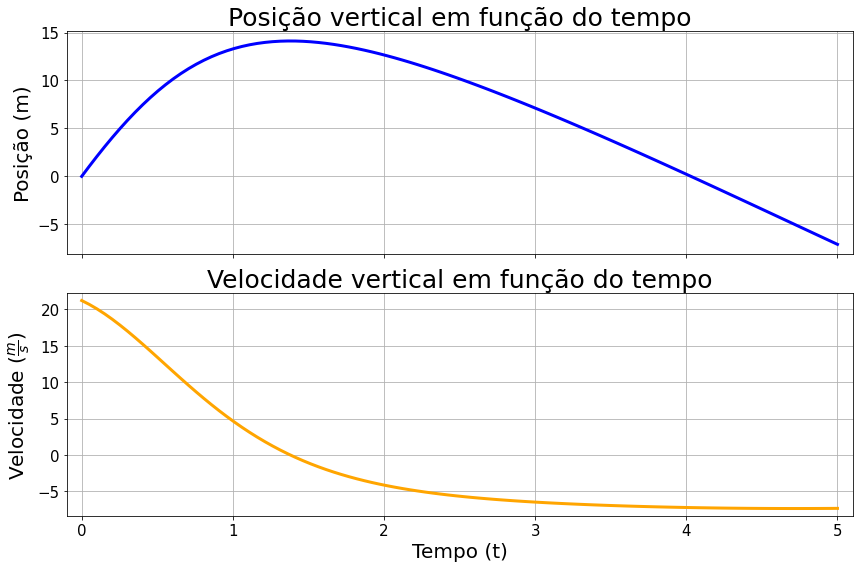

In [7]:
fig, ((z), (vz)) = plt.subplots(2, 1, sharex=True)
z.plot(sol.t, sol.y[1], c="b")
z.set_ylabel("Posição (m)")
z.set_title("Posição vertical em função do tempo")
z.set_ylim(sol.y[1].min()-1, sol.y[1].max()+1)

vz.plot(sol.t, sol.y[3], c="orange")
vz.set_ylabel(r"Velocidade ($\frac{m}{s}$)")
vz.set_title("Velocidade vertical em função do tempo")
vz.set_xlabel("Tempo (t)")
vz.set_xlim(t[0]-.1, t[-1]+.1)
vz.set_ylim(sol.y[3].min()-1, sol.y[3].max()+1)

Perceba que chegamos no que esperamos novamente. Pois, diferente de $x$, $z$ parte de zero e chega novamente em $0$, pelo fato que há uma aceleração descendente. Porém, ao ganhar velocidade, a resistência faz com que convirja.

### Alternativa (b)

#### Para realizar várias soluções diferentes usaremos um *loop* onde trocaremos somente os ângulos $\theta$ em um intervalo de $[0; 90]$. Dessa forma, temos:

Text(0, 0.5, 'Vertical (m)')

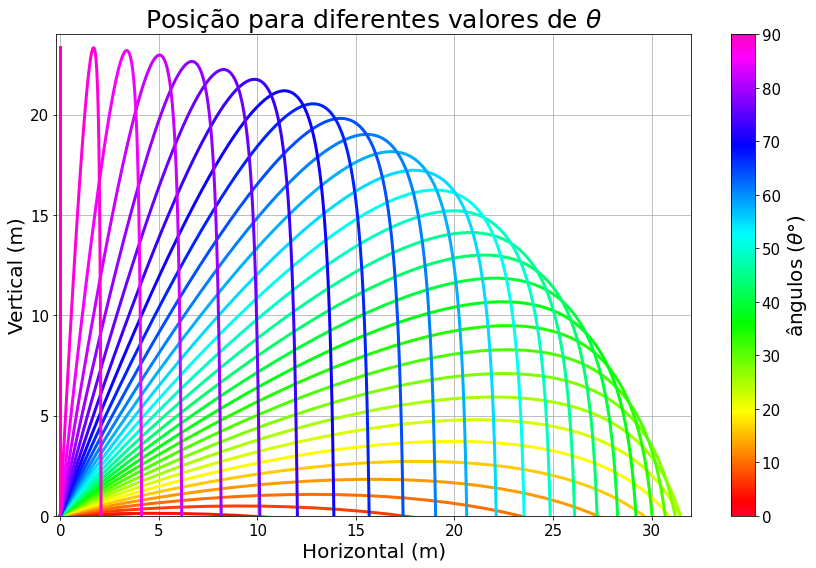

In [8]:
for _ in np.arange(0, 91, 3):  # loop variando $\theta$
    # Tranformando graus em radianos
    theta_i = np.radians(_)
    # Condições iniciais ara cada angulação
    vx0i = v0*np.cos(theta_i)
    vz0i = v0*np.sin(theta_i)
    # Solução para cada eixo
    sol_i = solve_ivp(r, [t[0], t[-1]], [x0, z0, vx0i, vz0i], "LSODA", t, args=(g, c, m))
    # Plotagem do grafico para cada theta
    plt.plot(sol_i.y[0], sol_i.y[1], c=cmap.to_rgba(_ + 1))


plt.colorbar(cmap, ticks=np.arange(0, 95, 10), label=r"ângulos ($\theta$°)")
plt.xlim(-.2, 32)
plt.ylim(0, 24)
plt.title(r"Posição para diferentes valores de $\theta$")
plt.xlabel("Horizontal (m)")
plt.ylabel("Vertical (m)")

Note que, o alcance máximo fica próximo dos 25° graus, menor que os 45° graus no caso sem resistência do ar. Pois, quanto mais tempo durar o percurso mais maior será desaceleração pela resistência do ar, além disso, para ele se manter mais tempo no ar ele deve se angular mais, logo, perdendo velocidade horizontal. Dessa forma, quando maior for o fator da resistência do ar, menor será o angulo para o alcance máximo.

### Alternativa (c)

Para agrupar estes pontos usaremos o parâmetro *event* da função *solve_ivp*. Esta função encontrará os demais valores, onde a variável de nosso interesse é zero. Dessa forma, pegaremos os pontos onde $\frac{dz}{dt}=0$, ou seja, o poto onde $z$ é máximo e $z=0$ onde o projetil está no chão, logo, podemos adquirir o máximo alcance. 

#### Definindo as funções onde queremos capturar os pontos:

In [9]:
def topo(t, r, g, c, m):  # Função para capturar pontos, no qual a velocidade em z é zero
    x, z, vx, vz = r
    return vz


def alcance(t, r, g, c, m):  # Função para capturar pontos, no qual o valor z é zero
    x, z, vx, vz = r
    return z

#### Fazendo soluções para varios $\theta$ igual o que foi feito no grafico anterio, porem com mais pontos:

In [10]:
pontos = np.array([[], [], []])  # Criando array para recolher os pontos

for _ in np.linspace(0, 90, 200, True):  # loop variando $\theta$
    # Tranformando graus em radianos
    theta_i = np.radians(_)
    # Condições iniciais para cada angulação
    vz0i = v0*np.sin(theta_i)
    vx0i = v0*np.cos(theta_i)
    # Solução do eixos x e z
    sol_i = solve_ivp(fun=r, t_span=[t[0], t[-1]], y0=[x0, z0, vx0i, vz0i], method="LSODA", t_eval=t, args=(g, c, m), events=(topo, alcance), dense_output=True)
    # Recolhendo somente os pontos de interesse gerados pela soção
    pontos = np.append(pontos, [[_], sol_i.y_events[0][:, 1], [
        sol_i.y_events[1][:, 0][1] if _ not in [0, 90] else sol_i.y_events[1][:, 0][0]]], 1)
    # note que foi feito uma condição para as situações, onde há somente uma raiz para z = 0

#### Plotando grafico da altura e alcance maximo em função do angulo:

Text(0, 0.5, 'Alcance máximo (m)')

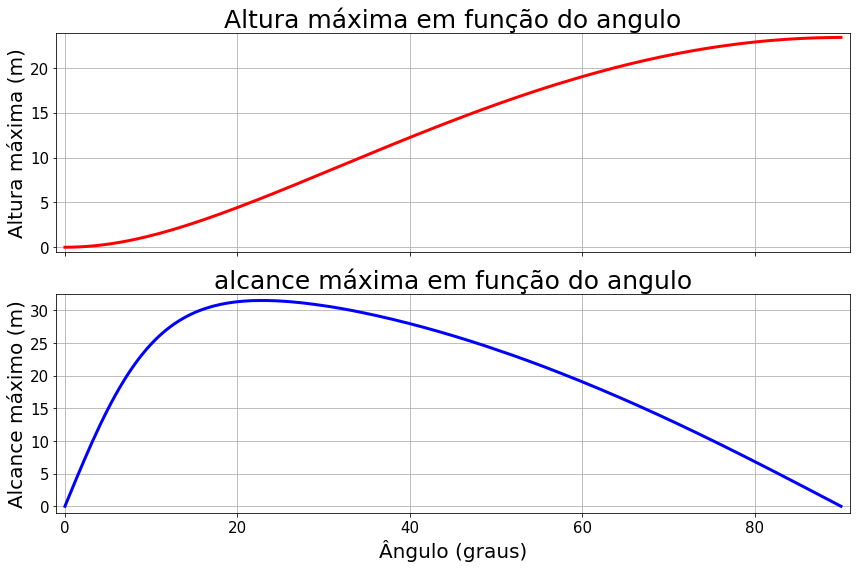

In [11]:
fig, ((ax1), (ax2)) = plt.subplots(2, 1, sharex=True)

ax1.plot(pontos[0], pontos[1], c="r")
ax1.set_title("Altura máxima em função do angulo")
ax1.set_ylim(pontos[1].min()-.5, pontos[1].max()+.5)
ax1.set_ylabel("Altura máxima (m)")

ax2.plot(pontos[0], pontos[2], c="b")
ax2.set_xlim(pontos[0][0]-1, pontos[0][-1]+1)
ax2.set_title("alcance máxima em função do angulo")
ax2.set_ylim(pontos[2].min()-1, pontos[2].max()+1)
ax2.set_xlabel("Ângulo (graus)")
ax2.set_ylabel("Alcance máximo (m)")

# Questão 2

Semelhante à questão anterior, porém agora com vento. Ou seja, teremos mais duas contantes interagindo na equação, uma para o eixo $x$ e outra para o $z$. Desta forma, temos:
$$\vec{v}_{rel} =\vec{v} - \vec{v}_w $$
considere $\vec{v_w} = u\hat{\imath} + w\hat{k}$.

As condições iniciais são as mesmas.

## Alternativa (a)

Para resolver esta questão precisamos desmembrar o vetor posição em suas componentes.
$$ m \frac{d^2\vec{r}}{dt^2} =-mg\hat{k} - c\vec{v}_{rel}|\vec{v}_{rel}|$$

Dessa forma, temos duas EDOs de segunda ordem.

$$ \frac{d^2x}{dt^2} = - \frac{c}{m} \left(\frac{dx}{dt}-u\right) \sqrt{\left(\frac{dx}{dt}-u \right)^2 + \left(\frac{dz}{dt} - w \right)^2}
$$
$$ \frac{d^2x}{dt^2} = - \frac{c}{m} \left(\frac{dz}{dt}-w\right) \sqrt{\left(\frac{dx}{dt}-u \right)^2 + \left(\frac{dz}{dt} - w \right)^2}
$$

#### Definindo função das EDOs para resolvê-las:

In [12]:
def r_v(t, r, g, c, m, u, w):
    x, z, vx, vz = r
    # Derivada da segunda de x
    ddx = - c/m * (vx - u) * np.hypot(vx - u, vz - w)
    # Derivada da segunda de z
    ddz = - g - c/m * (vz - w) * np.hypot(vx - u, vz - w)
    return [vx, vz, ddx, ddz]

#### Definindo condições iniciais, constantes e valores da solução:

In [13]:
# CondiçÕes iniciais
x0 = 0
z0 = 0
v0 = 30
theta = np.pi/4
vx0 = v0*np.cos(theta)
vz0 = v0*np.sin(theta)
# Constantes
g = 9.8
c = 3
m = 5
u = 1
w = -2
# Intervalo da solução
t = np.linspace(0, 8, 300, True)

#### Resolvendo as EDOs numericamente com o método LSODA:

In [14]:
sol_v = solve_ivp(fun=r_v, t_span=[t[0], t[-1]], y0=[x0, z0, vx0, vz0], args=(
    g, c, m, u, w), t_eval=t, method="LSODA")

#### Plotando gráfico da solução para velocidade e posição em  função do tempo:

(-3.204101373133206e-05, 22.213203435596427)

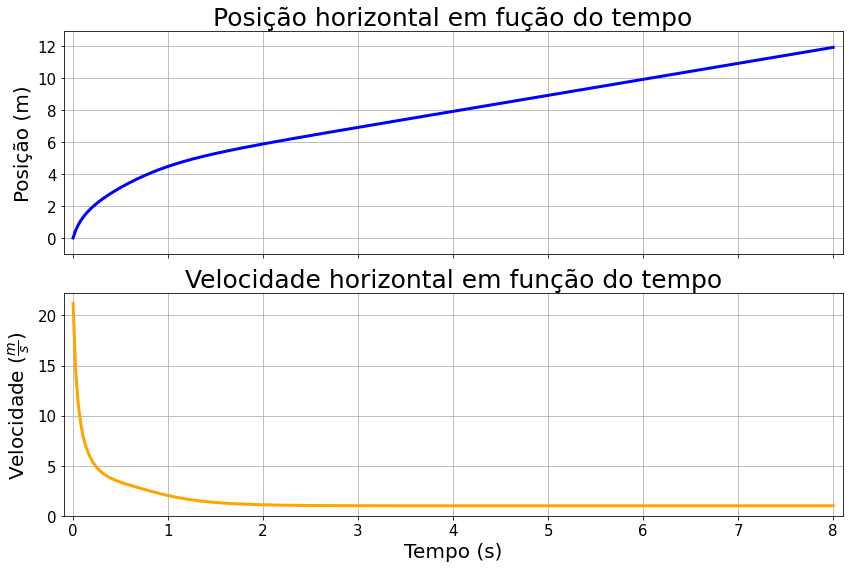

In [15]:
fig, ((xu), (vxu)) = plt.subplots(2, 1, sharex=True)
xu.plot(sol_v.t, sol_v.y[0], c="b")
xu.set_ylabel("Posição (m)")
xu.set_title("Posição horizontal em fução do tempo")
xu.set_ylim(sol_v.y[0].min() - 1, sol_v.y[0].max()+1)

vxu.plot(sol_v.t, sol_v.y[2], c="orange")
vxu.set_xlabel("Tempo (s)")
vxu.set_ylabel(r"Velocidade ($\frac{m}{s}$)")
vxu.set_title("Velocidade horizontal em função do tempo")
vxu.set_xlim(t[0]-.1, t[-1]+.1)
vxu.set_ylim(sol_v.y[2].min() - 1, sol_v.y[2].max()+1)

No gráfico da velocidade em função do tempo, note que este valor colabora com o que esperávamos, pois a velocidade tende à mesma do vento. Visto que o vento desacelerará ou acelerará o projétil por meio da resistência do ar. Note que, como há velocidade favorável ao movimento, a posição sempre aumentará, o que não ocorreria se não houvesse vento ou se tivesse um vento contrário, que mudaria o sentido da trajetória horizontal.

#### Plotando gráfico da posição vertical em função do tempo:

(-7.045712941778493, 22.213203435596423)

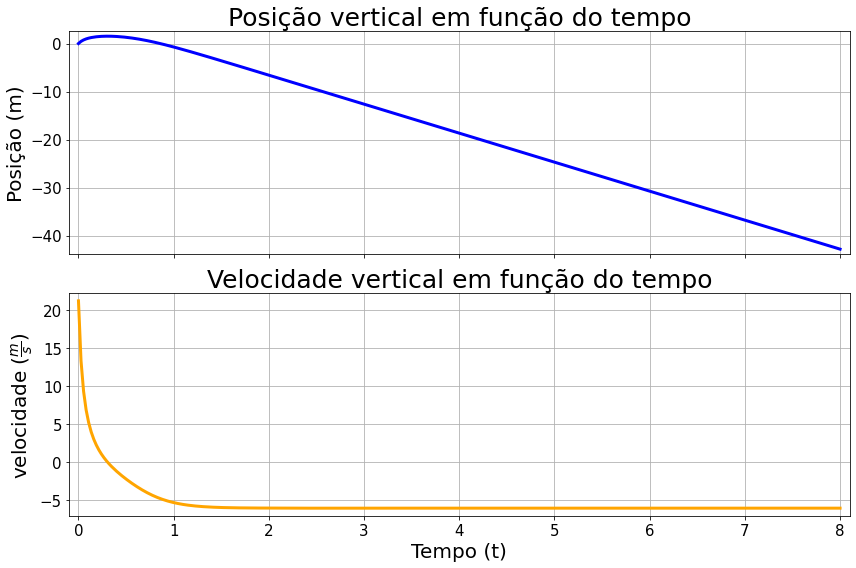

In [16]:
fig, ((zw), (vzw)) = plt.subplots(2, 1, sharex=True)
zw.plot(sol_v.t, sol_v.y[1], c="b")
zw.set_ylabel("Posição (m)")
zw.set_title("Posição vertical em função do tempo")
zw.set_ylim(sol_v.y[1].min() - 1, sol_v.y[1].max()+1)

vzw.plot(sol_v.t, sol_v.y[3], c="orange")
vzw.set_ylabel(r"velocidade ($\frac{m}{s}$)")
vzw.set_title("Velocidade vertical em função do tempo")
vzw.set_xlabel("Tempo (t)")
vzw.set_xlim(t[0]-.1, t[-1]+.1)
vzw.set_ylim(sol_v.y[3].min() - 1, sol_v.y[3].max()+1)

Como a velocidade do vento vertical é descendente, perceba que o projétil desacelera com mais rapidez e acelera em movimento descendente mais rapidamente. Dessa forma, causará uma queda do projétil em menos tempo. Além disso, observe que a velocidade em $z$ também converge, pois, quanto maior a velocidade, maior será a influência da resistência do ar. Até o ponto onde se igualarão, ou seja, a posição em função do tempo será linear.

## Alternativa (b)

Como o objetivo é pegar diversas combinações entre $\theta$, $u$ e $w$. Sabendo disso, usaremos a função *random.randint* para aleatorizar as escolhas das constantes $u$ e $w$ variando $\theta$ entre $[5; 90]$. Dessa forma, temos:

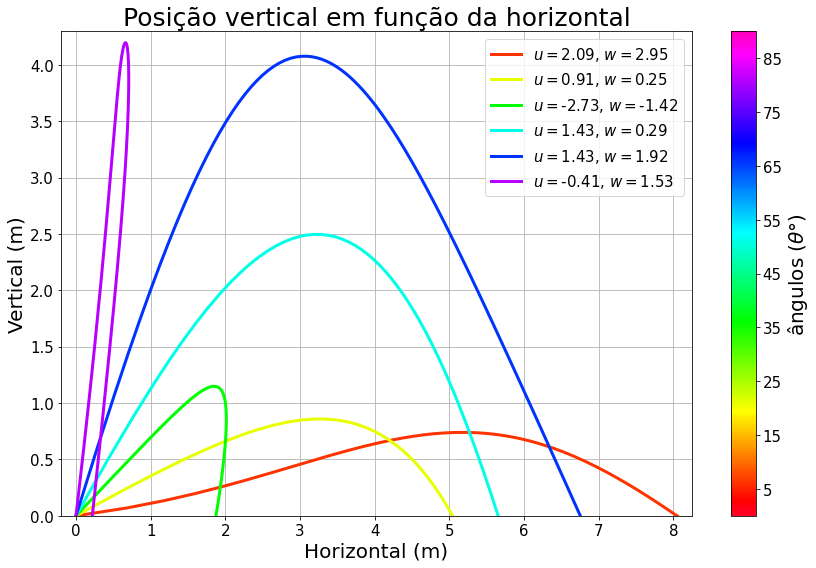

In [17]:
# Função para capturar pontos, no qual a velocidade em z é zero
def topo_uw(t, r, g, c, m, u, w):
    x, z, vx, vz = r
    return vz


# Função para capturar pontos, no qual z é zero
def alcanse_uw(t, r, g, c, m, u, w):
    x, z, vx, vz = r
    return z


# arrays para agrupar os pontos, para fazer um auto limite no grafico
chao = np.array([])
topo = np.array([])


for _ in np.arange(5, 90, 15):
    theta_i = np.radians(_)
    u, w = np.random.uniform(-3, 3, 2)
    vx0i = v0*np.cos(theta_i)
    vz0i = v0*np.sin(theta_i)
    sol_vi = solve_ivp(fun=r_v, t_span=[t[0], t[-1]], y0=[x0, z0, vx0i, vz0i], args=(g, c, m, u, w), t_eval=t, method="LSODA", events=(alcanse_uw, topo_uw))
    # Recolhendo os pontos
    chao = np.append(chao, sol_vi.y_events[0][:, 0])
    topo = np.append(topo, sol_vi.y_events[1][:, 1])
    plt.plot(sol_vi.y[0], sol_vi.y[1], label=r"$u=$"f"{u:.2f},"+r" $w=$"f"{w:.2f}", c=cmap.to_rgba(_ + 1))

plt.colorbar(cmap, ticks=np.arange(5, 95, 10), label=r"ângulos ($\theta$°)")
# usando os pontos para ajustar plotagem automatico
plt.xlim(chao.min()-.2, chao.max()+.2)
plt.ylim(0, topo.max()+.1)
plt.title("Posição vertical em função da horizontal")
plt.xlabel("Horizontal (m)")
plt.ylabel("Vertical (m)")
plt.legend()

Note que, para ângulos menores o alcance e altura são mais consistentes. Porque, quanto menos tempo o projétil fica no ar, menos tempo ele será influenciado pela resistência do ar. Além disso, como as entradas de velocidade de vento são aleatórias dentro um intervalo de $[-3; 3]$ há momentos que o vento corrobora com a velocidade vertical, de modo que mantém o projétil por mais tempo no ar. Dessa forma, fazendo com que o vento horizontal leve o projétil para pontos de lançamento ou antes. Contudo, isso só ocorre para ângulos maiores, pois, como foi dito, quanto mais tempo no ar mais mudanças a resistência do ar causará.

Com o link do GitHub pode-se testar esta geração randomizada. Note que, o gráfico se ajusta automaticamente para a melhor representação.

# Questão 3

Semelhante às questões anteriores, porém agora com a resistência do ar variando. Ou seja, teremos um comportamento diferente, pois quanto mais alto a partícula estiver, menor será a resistência do ar. E com isto, freando menos.

O fator com que a resistência do ar diminui é descrita por:
$$e^{-\frac{z}{h}}$$ 

As condições iniciais são as mesmas.

## Alternativa (a)

Como a resistência do ar varia em função da altura precisamos aplicar em ambas as equações do movimento.

$$ \frac{d^2x}{dt^2} = - \frac{c}{m} \frac{dx}{dt}\sqrt{\left(\frac{dx}{dt} \right)^2 + \left(\frac{dz}{dt} \right)^2} e^{-z/h}
$$
$$\frac{d^2z}{dt^2} = - g - \frac{c}{m} \frac{dz}{dt}\sqrt{\left(\frac{dx}{dt} \right)^2 + \left(\frac{dz}{dt} \right)^2} e^{-z/h}
$$


#### Definindo função par resolver as EDOs:

In [18]:
def r_h(t, r, g, c, m, h):
    x, z, vx, vz = r
    ddx = - c/m * vx * np.exp(-z/h) * np.hypot(x, z)
    ddz = -g - c/m * vz * np.exp(-z/h) * np.hypot(x, z)
    return [vx, vz, ddx, ddz]

#### Definindo condições iniciais, constantes, intervalo da solução numerica:

In [19]:
# condições iniciais
x0 = 0
z0 = 0
v0 = 30
theta = np.radians(45)
vx0 = v0*np.cos(theta)
vz0 = v0*np.sin(theta)
# constantes
g = 9.8
c = 1.3
m = 5
h = 4
# Intervalo da solução
t = np.linspace(0, 7, 200, True)

#### Resolvendo a EDO numericamente com o método LSODA:

In [20]:
sol_e = solve_ivp(fun=r_h, t_span=[t[0], t[-1]], y0=[x0, x0, vx0, vz0], method="LSODA", t_eval=t, args=(g, c, m, h))

#### Plotando gráfico da posição horizontal em função do tempo:

(-1.000000526476611, 22.213203435596427)

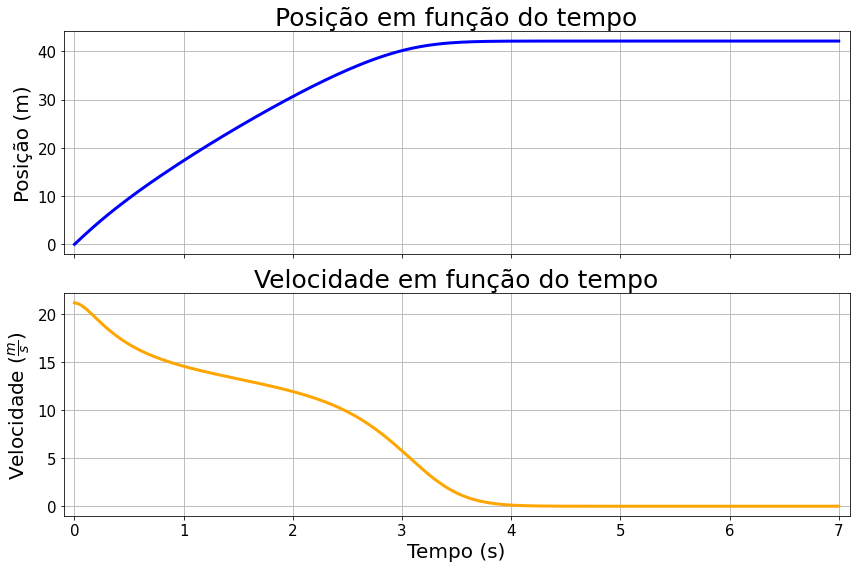

In [21]:
fig, ((x), (vx)) = plt.subplots(2, 1, sharex=True)
x.plot(sol_e.t, sol_e.y[0], label="Posição em fução do tempo", c="b")
x.set_ylabel("Posição (m)")
x.set_title("Posição em função do tempo")
x.set_ylim(sol_e.y[0].min()-2, sol_e.y[0].max()+2)

vx.plot(sol_e.t, sol_e.y[2], label="Velocidade em função do tempo", c="orange")
vx.set_xlabel("Tempo (s)")
vx.set_ylabel(r"Velocidade ($\frac{m}{s}$)")
vx.set_title("Velocidade em função do tempo")
vx.set_xlim(t[0]-.1, t[-1]+.1)
vx.set_ylim(sol_e.y[2].min()-1, sol_e.y[2].max()+1)

Observe que o comportamento é quase linear, isto ocorre, pois, quanto mais alto, menor será a resistência do ar. Com a diminuição da velocidade, a influência da resistência também diminui. Dessa forma, atenuando a curva por dois motivos. Além disso, o projétil, ao realizar o movimento descendente, tem a resistência do ar aumentada exponencialmente. Aponto em casos de parar o projétil no eixo $x$ antes de tocar o chão, pois com o aumento exponencial da resistência do ar a velocidade tende a zero mais rapidamente.

#### Plotando gráfico da posição vertical em função do tempo:

(-9.39469841116954, 22.213203435596423)

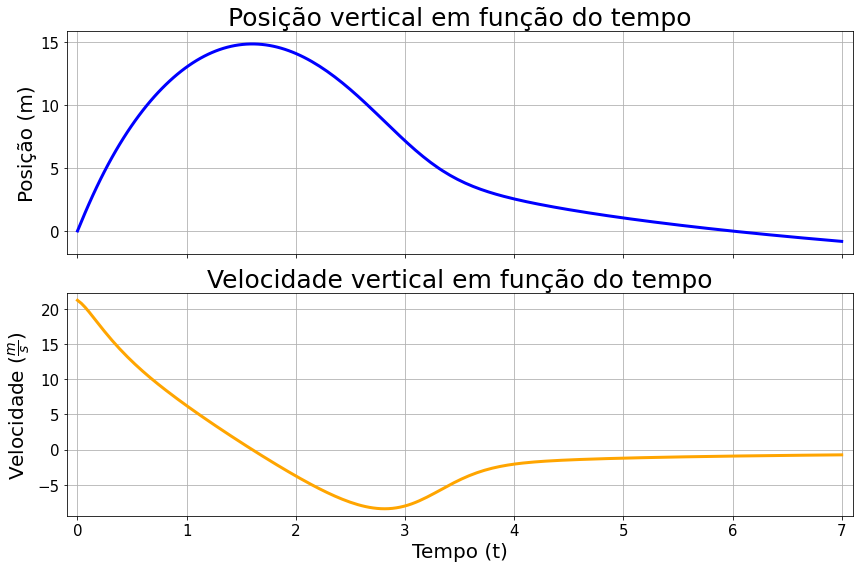

In [22]:
fig, ((z), (vz)) = plt.subplots(2, 1, sharex=True)
z.plot(sol_e.t, sol_e.y[1], c="b")
z.set_ylabel("Posição (m)")
z.set_title("Posição vertical em função do tempo")
z.set_ylim(sol_e.y[1].min()-1, sol_e.y[1].max()+1)

vz.plot(sol_e.t, sol_e.y[3], c="orange")
vz.set_ylabel(r"Velocidade ($\frac{m}{s}$)")
vz.set_title("Velocidade vertical em função do tempo")
vz.set_xlabel("Tempo (t)")
vz.set_xlim(t[0]-.1, t[-1]+.1)
vz.set_ylim(sol_e.y[3].min()-1, sol_e.y[3].max()+1)

Note que a subida do projetil é mais rápida que a descida. Porque ao subir com a velocidade inicial a resistência do ar diminui e para descer iniciando verticalmente parada a resistência aumenta tanto por estar caindo quanto por estar aumentando a velocidade. Dessa forma, atenuando a descida. Isso fica evidente no gráfico da velocidade, pois logo após começar a descida a velocidade é atenuada e tende a zero. Mas só ficará próximo de zero após $z=0$ (sem significado físico), pois a resistência do ar começará a aumentar exponencialmente.

### Alternativa (b)

Text(0, 0.5, 'Vertical (m)')

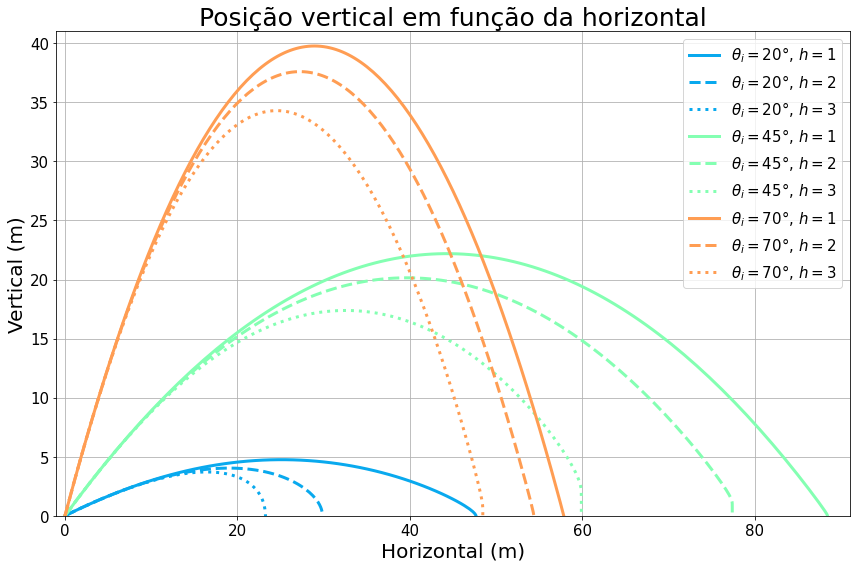

In [23]:
# Lista de estilos de linha para diferencialas por angulo
selectstyle = ["solid", "dashed", "dotted"]

# loop variando theta
for _ in np.linspace(20, 70, 3, True):
    # loop variando h para cada theta
    for __ in np.arange(1, 4):
        h = __
        theta_i = np.radians(_)
        vx0i = v0*np.cos(theta_i)
        vz0i = v0*np.sin(theta_i)
        sol_ei = solve_ivp(fun=r_h, t_span=[t[0], t[-1]], y0=[x0, z0, vx0i, vz0i], method="LSODA",t_eval=t, args=(g, c, m, h))
        plt.plot(sol_ei.y[0], sol_ei.y[1], label=r"$\theta _i=$" + f"{_:.0f}°"+r", $h=$"+f"{__:.0f}", c=cmap2.to_rgba(_ + 1), linestyle=selectstyle[__-1])

plt.legend()
plt.xlim(-1, 91)
plt.ylim(0, 41)
plt.title("Posição vertical em função da horizontal")
plt.xlabel("Horizontal (m)")
plt.ylabel("Vertical (m)")

Note que, quando maior for $h$ maior será a influência da resistência do ar, pois a exponencial diminui mais lentamente e, por isso, o alcance é maior para menores valores de $h$. Além disso, ao cair, o projétil terá uma resistência do ar crescente, o que faz o projétil cair mais lentamente e desacelerar no eixo $x$ mais rapidamente. Note que, em alguns casos, o projétil fica sem velocidade na horizontal.